# Assignment 5

In [76]:
import numpy as np 
import pandas as pd 

from matplotlib.pyplot import subplots 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

from sklearn.utils import shuffle

from tqdm import tqdm

## Gradient boosting method
So here, if I am right, there is two main methods : One for regression and one other for classification

### **Pseudo-Code: Gradient Boosting for Regression**

Here’s a structured and refined pseudo-code for Gradient Boosting for Regression based on your notes:

---

#### **Inputs**:
- Training data: $ \{(X_i, y_i)\}_{i=1}^n $
- Differentiable loss function: $ L(y_i, F(X)) = \frac{1}{2} (y_i - F(X_i))^2 $
- Learning rate: $ \alpha $
- Number of trees: $ M $
- Maximum tree depth: $ d $

---

#### **Step 1: Initialization**
1. Compute the **initial prediction** $ F_0 $ as the average of the target values:
   $$
   F_0 = \frac{1}{n} \sum_{i=1}^n y_i
   $$

---

#### **Step 2: Gradient Boosting Loop**
For $ m = 1 $ to $ M $ (number of trees):
1. **Compute residuals**:
   $$
   r_{m, i} = -\frac{\partial L(y_i, F_{m-1}(X_i))}{\partial F_{m-1}(X_i)}
   $$
   For $ L(y_i, F(X)) = \frac{1}{2}(y_i - F(X))^2 $, this simplifies to:
   $$
   r_{m, i} = y_i - F_{m-1}(X_i)
   $$

2. **Fit a regression tree**:
   - Train a regression tree $ T_m(X) $ of maximum depth $ d $ on the residuals $ r_{m, i} $.
   - The tree splits the data into $ J $ terminal regions (leaves) $ R_{m, j} $.

3. **Compute leaf values**:
   For each leaf $ R_{m, j} $, compute:
   $$
   \gamma_{m, j} = \text{average of residuals in } R_{m, j}
   $$
   $$
   \gamma_{m, j} = \frac{\sum_{X_i \in R_{m,j}} r_{m, i}}{|R_{m, j}|}
   $$

4. **Update the prediction model**:
   For each sample $ X_i $:
   $$
   F_m(X_i) = F_{m-1}(X_i) + \alpha \cdot \gamma_{m, j}, \quad \text{where } X_i \in R_{m,j}
   $$

---

#### **Step 3: Final Prediction**
For each sample $ X_i $, compute the final prediction:
$$
F_M(X_i) = F_0 + \sum_{m=1}^M \alpha \cdot \gamma_{m, j}, \quad \text{where } X_i \in R_{m,j}
$$

---

#### **Key Notes**
1. **Residuals**: Represent the negative gradient of the loss function with respect to the current predictions.
2. **Leaf Values**: Each leaf value $ \gamma_{m,j} $ corrects the predictions of the previous trees.
3. **Learning Rate**: $ \alpha $ controls the step size, preventing overfitting by scaling updates.
4. **Stopping Criteria**: Typically, the number of trees $ M $ or early stopping (validation loss) is used.

---

This pseudo-code is precise and matches your notes while being easy to follow. Let me know if you’d like additional examples or diagrams to illustrate the steps!


### **Pseudo-Code: Gradient Boosting for Classification**

Here’s a structured and refined pseudo-code for Gradient Boosting for Classification based on your notes:

---

#### **Inputs**:
- Training data: $ \{(X_i, y_i)\}_{i=1}^n $, where $ y_i \in \{0, 1\} $ (binary classification)
- Loss function: Negative log-likelihood:
  $$
  \mathcal J  = -y_i \ln(p) + \ln(1 + e^{F(X_i)})
  $$
- Learning rate: $ \alpha $
- Number of trees: $ M $
- Maximum tree depth: $ d $

---

#### **Step 1: Initialization**
1. Compute the **initial log-odds**:
   $$
   F_0(X_i) = \ln\left(\frac{\text{\# positive samples}}{\text{\# negative samples}}\right)
   $$
2. Compute the **initial probability** for each sample:
   $$
   p_0(X_i) = \sigma(F_0(X_i)) = \frac{1}{1 + e^{-F_0(X_i)}}
   $$

---

#### **Step 2: Gradient Boosting Loop**
For $ m = 1 $ to $ M $ (number of trees):
1. **Compute pseudo-residuals**:
   - Residuals are the negative gradient of the loss with respect to $ F(X_i) $:
     $$
     r_{m, i} = -\frac{\partial J}{\partial F(X_i)} = y_i - p_{m-1}(X_i)
     $$

2. **Fit a regression tree**:
   - Train a regression tree $ T_m(X) $ of maximum depth $ d $ on the pseudo-residuals $ r_{m, i} $.
   - The tree splits the data into $ J $ terminal regions (leaves) $ R_{m,j} $.

3. **Compute leaf values**:
   - For each leaf $ R_{m, j} $, compute:
     $$
     \gamma_{m,j} = \frac{\sum_{X_i \in R_{m,j}} r_{m, i}}{\sum_{X_i \in R_{m,j}} p_{m-1}(X_i)(1 - p_{m-1}(X_i))}
     $$
     Where:
     - $ p_{m-1}(X_i) = \sigma(F_{m-1}(X_i)) = \frac{1}{1 + e^{-F_{m-1}(X_i)}} $

4. **Update the prediction model**:
   - For each sample $ X_i $:
     $$
     F_m(X_i) = F_{m-1}(X_i) + \alpha \cdot \gamma_{m,j}, \quad \text{where } X_i \in R_{m,j}
     $$

---

#### **Step 3: Final Prediction**
1. Compute the final prediction for each sample $ X_i $:
   $$
   \hat{p}(X_i) = \sigma(F_M(X_i)) = \frac{1}{1 + e^{-F_M(X_i)}}
   $$
   Where:
   $$
   F_M(X_i) = F_0(X_i) + \sum_{m=1}^M \alpha \cdot \gamma_{m,j}, \quad \text{where } X_i \in R_{m,j}
   $$

2. Classify samples based on the probability threshold (e.g., $ \hat{p}(X_i) > 0.5 $).

---

### **Key Notes**
1. **Residuals**:
   - Residuals $ r_{m,i} $ approximate the gradient of the loss function.
   - These residuals are used to fit regression trees in each iteration.

2. **Leaf Values ($ \gamma_{m,j} $)**:
   - Computed as the ratio of the sum of residuals to the sum of the product $ p(1-p) $ within each leaf.

3. **Learning Rate ($ \alpha $)**:
   - Scales updates to prevent overfitting and stabilize learning.

4. **Final Prediction**:
   - Probabilities are derived from the final log-odds $ F_M(X_i) $ using the sigmoid function.

---

This refined pseudo-code covers all essential steps and aligns with your notes. Let me know if you'd like examples or additional clarifications!

## Implement from scratch

### Import dataset

In [10]:
# Load the dataset
df = pd.read_csv('data/wine_quality.csv', index_col=0)

X = df.drop(['quality', 'X'], axis=1)
y = df.quality

X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol_level
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,low
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,low
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,low
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,low


In [26]:
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)
y.head()

,low
1,True
2,True
3,True
4,True
5,True


In [19]:
# Deal with missing values
X.isnull().sum()
# Well no need to deal with them fortunately

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol_level_low       0
dtype: int64

### Classification Gradient Boosting

In [109]:
# define the gradient boosting tree class
class GradientBoostingTree:
    def __init__(self, n_estimators=100, learning_rate=0.001, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.gammas = []
        self.F_0 = None

    def fit(self, X, y):
        # Step 1: Initialization
        # 1.1 initial log-odds:
        self.F_0 = np.log(np.mean(y) / (1 - np.mean(y)))
        F_prev = np.ones(len(y)) * self.F_0

        # Step 2: gradient boosting loop for m = 1 to M (n_estimators):
        for m in tqdm(range(self.n_estimators)):
            p_prev = 1 / (1 + np.exp(-F_prev))
            # 2.1: Compute the pseudo-residuals
            residuals = y - p_prev

            # 2.2: Fit a regression tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Save the tree
            self.trees.append(tree)

            # 2.3: Compute the gammas for each leaf (extract from tree)
            leaf_indices = tree.apply(X)
            
            gamma = {}
            for leaf in np.unique(leaf_indices):
                # Get indices of samples in the current leaf. ndarray of shape (n_samples,)
                in_leaf = leaf_indices == leaf

                # the numerator is the sum of residuals in the leaf
                numerator = np.sum(residuals[in_leaf])
                # the denominator is the sum of the p(1-p) in the leaf
                denominator = np.sum(p_prev[in_leaf] * (1 - p_prev[in_leaf]))

                # Avoid division by zero
                gamma[leaf] = numerator / denominator if denominator != 0 else 0

            # store the gamma values
            self.gammas.append(gamma)

            # 2.4: Uptade the prediction model 
            for i in range(len(F_prev)):
                F_prev += self.learning_rate * gamma[leaf_indices[i]]

    def predict(self, X):
        F = np.ones(X.shape[0]) * self.F_0

        for m in tqdm(range(self.n_estimators)):
            gamma = self.gammas[m]
            tree = self.trees[m]
            leaf_indices = tree.apply(X)
            for i in range(len(F)):
                F[i] += self.learning_rate * gamma[leaf_indices[i]]

        # Return the probability
        return 1 / (1 + np.exp(-F))

In [174]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
gbt = GradientBoostingTree(n_estimators=5, learning_rate=0.001, max_depth=3)
gbt.fit(X_train, y_train)


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


In [175]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = gbt.predict(X_test)
y_pred_round = np.round(y_pred)

print(f'log loss: {log_loss(y_test, y_pred):.2f}')
# Evaluate the model with the accuracy and F1 score
print(f'Accuracy: {accuracy_score(y_test, y_pred_round):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_round):.2f}')

100%|██████████| 5/5 [00:00<00:00, 574.29it/s]

log loss: 8.13
Accuracy: 0.77
F1 Score: 0.87


In [194]:
def cross_validate(model, X, y, k=5):
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    log_losses_scores = []
    
    for i in range(k):
        val_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        # scale the data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        log_loss_score = log_loss(y_val, y_pred)
        log_losses_scores.append(log_loss_score)

    return np.mean(log_losses_scores)

In [197]:
# perform cross validation
gbt = GradientBoostingTree(n_estimators=5, learning_rate=0.001, max_depth=3)
log_loss_score = cross_validate(gbt, X.values, y.values)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 253.92it/s]


In [198]:
log_loss_score

7.80516294023783

### Test different learning rates

In [ ]:
# Test different learning rates
learning_rates = np.logspace(-6, -3.5, 10)
log_losses = []

for lr in learning_rates:
    gbt = GradientBoostingTree(n_estimators=3, learning_rate=lr, max_depth=3)
    gbt.fit(X_train, y_train)
    y_pred = gbt.predict(X_test)
    log_losses.append(log_loss(y_test, y_pred))

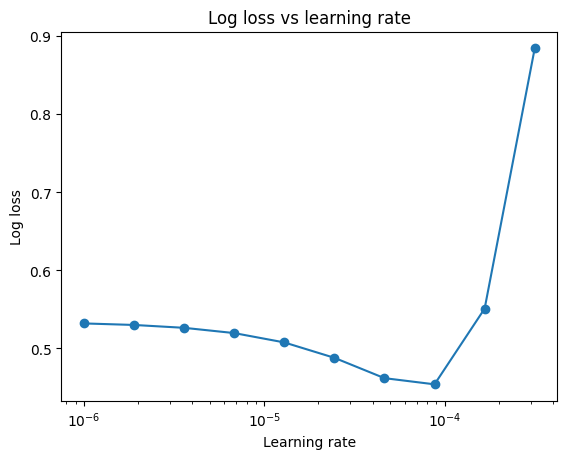

In [163]:
# plot the results
fig, ax = subplots()
ax.plot(learning_rates, log_losses, marker='o')
ax.set_xlabel('Learning rate')
ax.set_ylabel('Log loss')
ax.set_xscale('log')
ax.set_title('Log loss vs learning rate')
plt.show()

In [162]:
# extract the best learning rate
best_lr = learning_rates[np.argmin(log_losses)]
best_lr

8.799225435691074e-05

### Test different number of trees build for the model

In [ ]:
# Test different number of estimators
n_estimators = np.arange(1, 10, 2)
log_losses = []

for n in n_estimators:
    gbt = GradientBoostingTree(n_estimators=n, learning_rate=best_lr, max_depth=3)
    gbt.fit(X_train, y_train)
    y_pred = gbt.predict(X_test)
    log_losses.append(log_loss(y_test, y_pred))

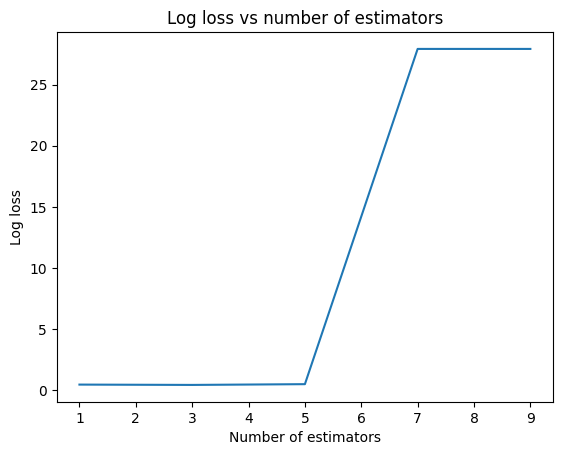

In [166]:
# plot the results
fig, ax = subplots()
ax.plot(n_estimators, log_losses)
ax.set_xlabel('Number of estimators')
ax.set_ylabel('Log loss')
ax.set_title('Log loss vs number of estimators')
plt.show()

In [167]:
log_losses

[0.4808569241829506,
 0.45394233210760226,
 0.5159235172077205,
 27.91544175748971,
 27.91544175748971]

## Compare the results with Sklearn Model

In [187]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the models
gbt = GradientBoostingTree(n_estimators=3, learning_rate=best_lr, max_depth=3)
gbt.fit(X_train, y_train)

gbt_sklearn = GradientBoostingClassifier(n_estimators=3, learning_rate=best_lr, max_depth=3)
gbt_sklearn.fit(X_train, y_train)

# Make probability predictions
y_pred = gbt.predict(X_test)
y_pred_sklearn = gbt_sklearn.predict_proba(X_test)

# Evaluate the model with the log loss for both models
print(f'Custom Gradient Boosting Tree log loss: {log_loss(y_test, y_pred):.2f}')
print(f'Sklearn Gradient Boosting Tree log loss: {log_loss(y_test, y_pred_sklearn):.2f}\n')

# Evaluate the model with the accuracy and F1 score for both models
y_pred_round = np.round(y_pred)
y_pred_round_sklearn = gbt_sklearn.predict(X_test)

print(f'Custom Gradient Boosting Tree Accuracy: {accuracy_score(y_test, y_pred_round):.2f}')
print(f'Sklearn Gradient Boosting Tree Accuracy: {accuracy_score(y_test, y_pred_round_sklearn):.2f}\n')
print(f'Custom Gradient Boosting Tree F1 Score: {f1_score(y_test, y_pred_round):.2f}')
print(f'Sklearn Gradient Boosting Tree F1 Score: {f1_score(y_test, y_pred_round_sklearn):.2f}')


100%|██████████| 3/3 [00:03<00:00,  1.08s/it]
c:\Users\doria\Documents\pythonEnv\dataScience\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100%|██████████| 3/3 [00:00<00:00, 641.63it/s]

Custom Gradient Boosting Tree log loss: 0.45
Sklearn Gradient Boosting Tree log loss: 0.53

Custom Gradient Boosting Tree Accuracy: 0.80
Sklearn Gradient Boosting Tree Accuracy: 0.77

Custom Gradient Boosting Tree F1 Score: 0.88
Sklearn Gradient Boosting Tree F1 Score: 0.87


In [192]:
gbt_sklearn = GradientBoostingClassifier(n_estimators=1, learning_rate=best_lr, max_depth=3)
gbt_sklearn.fit(X_train, y_train)

gbt_sklearn.predict(X_test)

print(f'Sklearn Gradient Boosting Tree Accuracy: {accuracy_score(y_test, y_pred_round_sklearn):.2f}\n')

Sklearn Gradient Boosting Tree Accuracy: 0.77



c:\Users\doria\Documents\pythonEnv\dataScience\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
